In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import re
import matplotlib.ticker as ticker


In [83]:
df = pd.read_csv("/content/drive/MyDrive/saudi-pro-league-transfers.csv")
# To display the top 10 rows
df.head(10)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia


In [84]:
df.tail(10)                        # To display the botton 10 rows

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country
7853,Al-Raed SFC,Mamadou Loum,27.0,Defensive Midfield,FC Porto,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7854,Al-Ettifaq FC,Rayan Al-Bloushi,23.0,Centre-Forward,Al-Safa,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7855,Al-Taawoun FC,Flávio,28.0,Central Midfield,Trabzonspor,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7856,Al-Taawoun FC,Muath Faquihi,22.0,Left-Back,Al-Hilal,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7857,Khaleej FC,Abdalellah Hawsawi,NaN,Midfield,Ittihad C. U23,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia


In [126]:
data_summary = df.describe()

# Define a formatting function
def format_long_numbers(x):
    if abs(x) >= 1e9:
        return "{:.2f}B".format(x / 1e9)
    elif abs(x) >= 1e6:
        return "{:.2f}M".format(x / 1e6)
    elif abs(x) >= 1e3:
        return "{:.2f}K".format(x / 1e3)
    else:
        return "{:.2f}".format(x)

# Set the formatting function
pd.options.display.float_format = format_long_numbers

# Display the summary
print(data_summary)

        age     fee
count 7.74K  530.00
mean  26.23   2.91M
std    3.99   7.01M
min   16.00  19.00K
25%   23.00 400.00K
50%   26.00   1.00M
75%   29.00   2.57M
max   45.00  90.00M


In [129]:
club_counts = df['club_name'].value_counts().head(5)

# Display the top 5 most frequent values
print(club_counts)

Ittihad Club    640
Al-Ahli SFC     593
Al-Nassr FC     561
Al-Shabab FC    542
Al-Hilal SFC    535
Name: club_name, dtype: int64


In [85]:
df.count()

club_name             7858
player_name           7858
age                   7755
position              7858
club_involved_name    7858
fee                   7844
transfer_movement     7858
transfer_period       7858
league_name           7858
season                7858
country               7858
dtype: int64

we can see from the previous cell that There are MISSING VALUES in the following COLUMNS:
- age                   
- fee                   


In [86]:
#Checking the types of data
df.dtypes

club_name              object
player_name            object
age                   float64
position               object
club_involved_name     object
fee                    object
transfer_movement      object
transfer_period        object
league_name            object
season                 object
country                object
dtype: object

In [87]:
df.shape

(7858, 11)

In [88]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (2, 11)


In [89]:
duplicate_rows_df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country
1690,Al-Fateh SC,Yahia Al-Kabie,25.0,Left-Back,Shoalah,?,out,Summer,Saudi Professional League,2012/2013,Saudi Arabia
1831,Al-Shoalah FC,Yahia Al-Kabie,25.0,Left-Back,Al-Fateh,?,in,Summer,Saudi Professional League,2012/2013,Saudi Arabia


In [90]:
df[df["player_name"]=="Yahia Al-Kabie"]

#to make sure the prevoius rows are duplicate

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country
937,Al-Hilal SFC,Yahia Al-Kabie,23.0,Left-Back,Al-Watani,?,in,Summer,Saudi Professional League,2010/2011,Saudi Arabia
1241,Al-Hilal SFC,Yahia Al-Kabie,24.0,Left-Back,Al-Fateh,free transfer,out,Summer,Saudi Professional League,2011/2012,Saudi Arabia
1246,Al-Hilal SFC,Yahia Al-Kabie,24.0,Left-Back,Al-Fateh,?,out,Summer,Saudi Professional League,2011/2012,Saudi Arabia
1407,Al-Fateh SC,Yahia Al-Kabie,24.0,Left-Back,Al-Hilal,free transfer,in,Summer,Saudi Professional League,2011/2012,Saudi Arabia
1409,Al-Fateh SC,Yahia Al-Kabie,24.0,Left-Back,Al-Hilal,?,in,Summer,Saudi Professional League,2011/2012,Saudi Arabia
1686,Al-Fateh SC,Yahia Al-Kabie,25.0,Left-Back,Shoalah,?,out,Summer,Saudi Professional League,2012/2013,Saudi Arabia
1690,Al-Fateh SC,Yahia Al-Kabie,25.0,Left-Back,Shoalah,?,out,Summer,Saudi Professional League,2012/2013,Saudi Arabia
1827,Al-Shoalah FC,Yahia Al-Kabie,25.0,Left-Back,Al-Fateh,?,in,Summer,Saudi Professional League,2012/2013,Saudi Arabia
1831,Al-Shoalah FC,Yahia Al-Kabie,25.0,Left-Back,Al-Fateh,?,in,Summer,Saudi Professional League,2012/2013,Saudi Arabia
3097,Al-Wehda FC,Yahia Al-Kabie,28.0,Left-Back,Shoalah,free transfer,in,Summer,Saudi Professional League,2015/2016,Saudi Arabia


In [91]:
df = df.drop_duplicates()


In [92]:
df.count()      # Used to count the number of rows

club_name             7856
player_name           7856
age                   7753
position              7856
club_involved_name    7856
fee                   7842
transfer_movement     7856
transfer_period       7856
league_name           7856
season                7856
country               7856
dtype: int64

still we have missing values in:
- Age
- fee

In [93]:
#TO CHECK how many missing values we have
print(df.isnull().sum())

club_name               0
player_name             0
age                   103
position                0
club_involved_name      0
fee                    14
transfer_movement       0
transfer_period         0
league_name             0
season                  0
country                 0
dtype: int64


In [94]:
df = df.dropna()    # Dropping the missing values.
df.count()

club_name             7741
player_name           7741
age                   7741
position              7741
club_involved_name    7741
fee                   7741
transfer_movement     7741
transfer_period       7741
league_name           7741
season                7741
country               7741
dtype: int64

In [95]:
print(df.isnull().sum())

club_name             0
player_name           0
age                   0
position              0
club_involved_name    0
fee                   0
transfer_movement     0
transfer_period       0
league_name           0
season                0
country               0
dtype: int64


Now We have NO MISSING VALUES in our DATA

In [96]:
df['fee'] = df['fee'].apply(lambda x: re.findall(r'(\d+\.?\d*)([km]?)', str(x)))
df['fee'] = df['fee'].apply(lambda x: float(x[0][0]) * 1000 if (len(x) > 0 and len(x[0]) > 1 and x[0][1] == 'k') else (float(x[0][0]) * 1000000 if (len(x) > 0 and len(x[0]) > 1 and x[0][1] == 'm') else np.nan))

In [97]:
df['fee']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7852   NaN
7853   NaN
7854   NaN
7855   NaN
7856   NaN
Name: fee, Length: 7741, dtype: float64

OutLier detection

<Axes: xlabel='fee'>

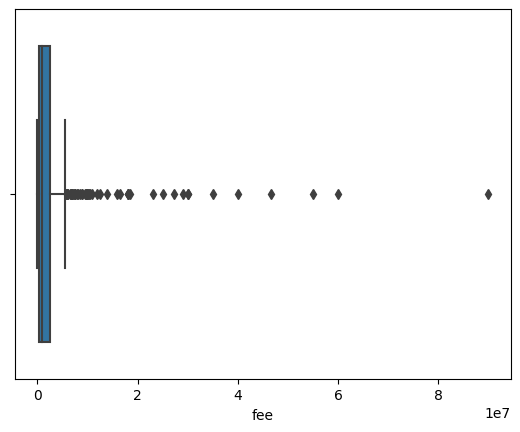

In [98]:
sns.boxplot(x=df['fee'])

In [99]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age          6.0
fee    2170000.0
dtype: float64


<ipython-input-99-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-99-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [100]:
df['fee'].max()

90000000.0

In [101]:
df['fee'].min()

19000.0

In [102]:
grouped_clubs = df.groupby('club_name')['fee'].sum()


In [103]:
grouped_clubs = grouped_clubs.sort_values(ascending=False)
grouped_clubs


club_name
Al-Hilal SFC       466171000.0
Al-Nassr FC        258904000.0
Al-Ahli SFC        257498000.0
Ittihad Club       229232000.0
Al-Shabab FC       104349000.0
Al-Ettifaq FC       51091000.0
Al-Taawoun FC       27090000.0
Al-Wehda FC         25974000.0
Al-Fateh SC         23692000.0
Al-Faisaly FC       18191000.0
Al-Fayha FC         18189000.0
Al-Qadsiah FC       12245000.0
Al-Batin FC          9759000.0
Al-Raed SFC          8234000.0
Damac FC             7675000.0
Al-Hazem SC          6885000.0
Abha Club            5173000.0
Al-Tai FC            3832000.0
Khaleej FC           2588000.0
Al-Ain FC            2000000.0
Al-Adalah FC         1501000.0
Najran SC            1188000.0
Al-Okhdood Club      1092000.0
Ohod Club             800000.0
Al-Riyadh SC          800000.0
Al-Ansar              100000.0
Hajer Club             81000.0
Al-Nahdah FC           50000.0
Al-Orobah FC           50000.0
Al-Watani                  0.0
Al-Shoalah FC              0.0
Name: fee, dtype: float64

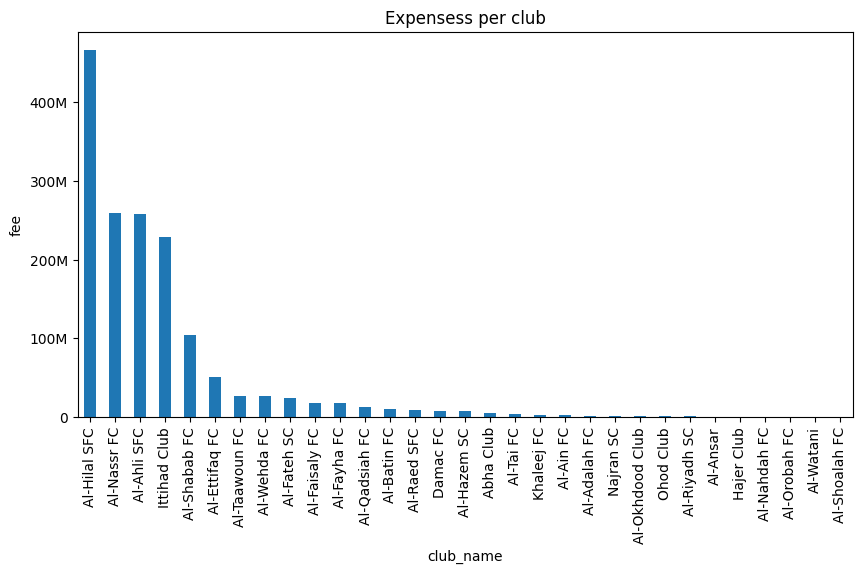

In [124]:
grouped_clubs.plot(kind='bar', figsize=(10,5))

# Abbreviate y-axis labels
def format_fee(value, _):
    if value >= 1e6:
        return '{:.0f}M'.format(value / 1e6)
    elif value >= 1e3:
        return '{:.0f}K'.format(value / 1e3)
    else:
        return '{:.0f}'.format(value)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_fee))

plt.title("Expensess per club")
plt.ylabel('fee')
plt.xlabel('club_name');

In [105]:
top_20_rows = df.nlargest(20, 'fee')

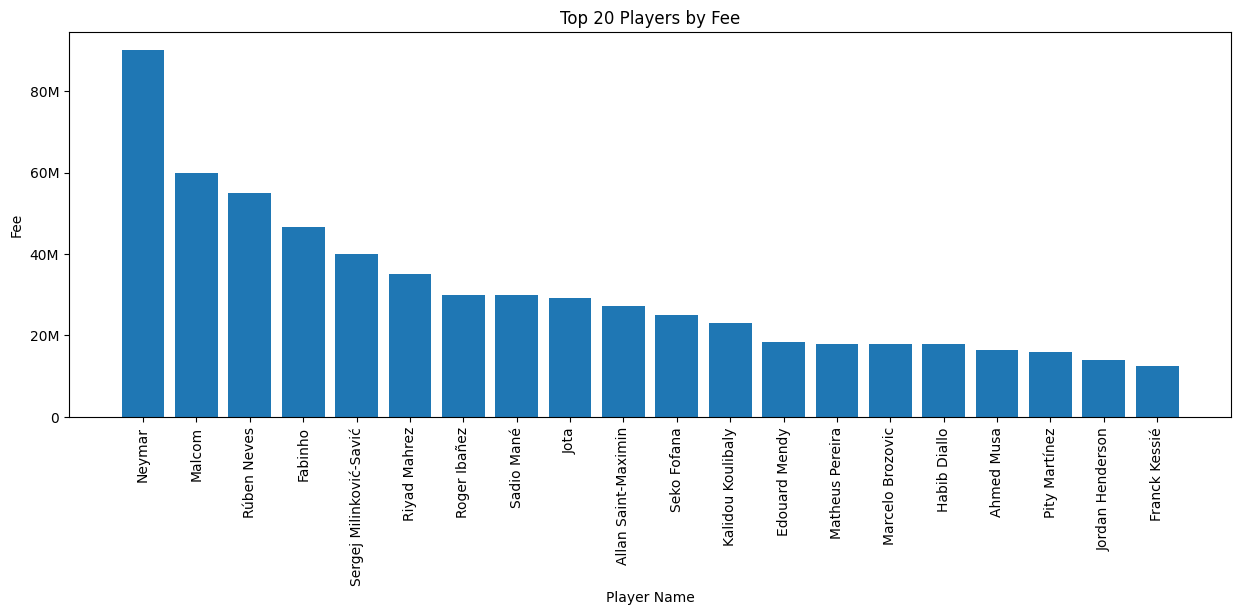

In [123]:
plt.figure(figsize=(15, 5))

# Create a bar plot
plt.bar(top_20_rows['player_name'], top_20_rows['fee'])

# Add labels and title
plt.xlabel('Player Name')
plt.ylabel('Fee')
plt.title('Top 20 Players by Fee')

# Adjust the appearance if needed
plt.xticks(rotation=90)  # Rotate x-axis labels if they are long

# Abbreviate y-axis labels
def format_fee(value, _):
    if value >= 1e6:
        return '{:.0f}M'.format(value / 1e6)
    elif value >= 1e3:
        return '{:.0f}K'.format(value / 1e3)
    else:
        return '{:.0f}'.format(value)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_fee))

# Display the plot
plt.show()

In [139]:
grouped_data = df.groupby(['club_name','position']).agg({'position': 'count', 'fee': 'mean'})

# Rename the columns
grouped_data.columns = ['count', 'average_fee']

# Display the grouped data
print(grouped_data)

                              count  average_fee
club_name position                              
Abha Club Attacking Midfield      6          NaN
          Central Midfield        8          NaN
          Centre-Back            22        1.11M
          Centre-Forward         20      450.00K
          Defence                 1          NaN
...                             ...          ...
Ohod Club Midfield                1          NaN
          Right Midfield          2          NaN
          Right Winger            6          NaN
          Right-Back              6          NaN
          Second Striker          4          NaN

[436 rows x 2 columns]


In [144]:
conditions = [
    (df['fee'] < 10000000),  # Example condition for low fee
    (df['fee'] >= 10000000) & (df['fee'] < 35000000),  # Example condition for mid fee
    (df['fee'] > 35000000)  # Example condition for high fee
]

labels = ['Low', 'Mid', 'High']  # Corresponding labels for each condition

# Use np.select to assign the appropriate label based on the conditions
df['rating_transfer'] = pd.np.select(conditions, labels, default='Unknown')

# Display the updated DataFrame
df.head(20)

<ipython-input-144-e86c58afd709>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['rating_transfer'] = pd.np.select(conditions, labels, default='Unknown')


,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country,rating_transfer
0,Al-Hilal SFC,Khaled Aziz,18.00,Defensive Midfield,Unknown,NaN,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown
1,Al-Hilal SFC,Sami Al-Jaber,27.00,Centre-Forward,Wolves,NaN,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.00,Right Winger,Al-Nassr,NaN,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown
3,Al-Hilal SFC,Saleh Al-Salloumi,37.00,Goalkeeper,Retired,NaN,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown
4,Al-Hilal SFC,Elijah Litana,29.00,Centre-Back,Retired,NaN,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown
5,Ittihad Club,Marzouq Al-Otaibi,24.00,Centre-Forward,Al-Shabab,2.00M,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Low
6,Ittihad Club,Khalid Massad,28.00,Attacking Midfield,Al-Ahli,NaN,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown
7,Ittihad Club,Ivan Malimon,21.00,Centre-Forward,Edessaikos,NaN,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown
8,Ittihad Club,Manaf Abushgeer,20.00,Left Midfield,Ittihad C. U23,NaN,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown
9,Ittihad Club,Darci,31.00,Left Winger,Antalyaspor,NaN,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown


In [145]:
df['year'] = df['season'].str[:4].astype(int)

In [146]:
df.head(10)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country,rating_transfer,year
0,Al-Hilal SFC,Khaled Aziz,18.00,Defensive Midfield,Unknown,NaN,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown,2000
1,Al-Hilal SFC,Sami Al-Jaber,27.00,Centre-Forward,Wolves,NaN,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown,2000
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.00,Right Winger,Al-Nassr,NaN,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown,2000
3,Al-Hilal SFC,Saleh Al-Salloumi,37.00,Goalkeeper,Retired,NaN,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown,2000
4,Al-Hilal SFC,Elijah Litana,29.00,Centre-Back,Retired,NaN,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown,2000
5,Ittihad Club,Marzouq Al-Otaibi,24.00,Centre-Forward,Al-Shabab,2.00M,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Low,2000
6,Ittihad Club,Khalid Massad,28.00,Attacking Midfield,Al-Ahli,NaN,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown,2000
7,Ittihad Club,Ivan Malimon,21.00,Centre-Forward,Edessaikos,NaN,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown,2000
8,Ittihad Club,Manaf Abushgeer,20.00,Left Midfield,Ittihad C. U23,NaN,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown,2000
9,Ittihad Club,Darci,31.00,Left Winger,Antalyaspor,NaN,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Unknown,2000


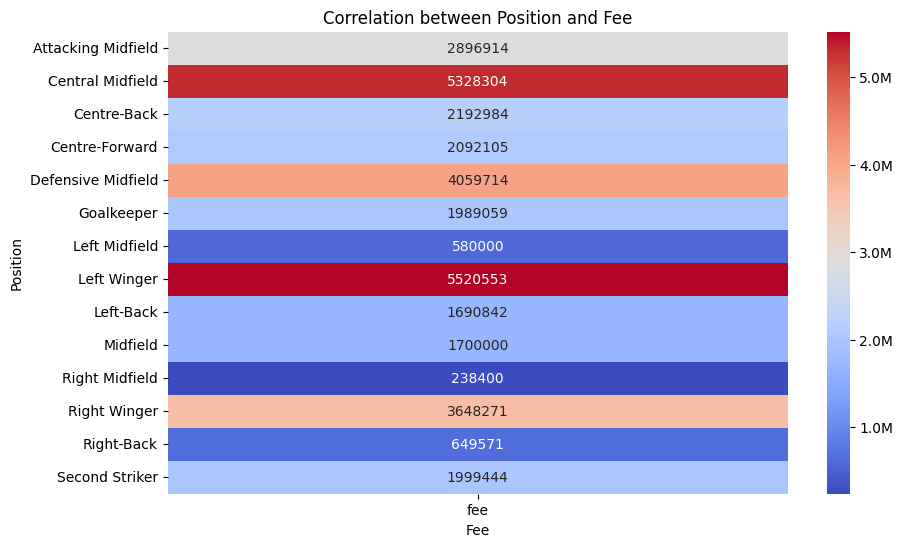

In [153]:
# Pivot the data to create a matrix of positions and corresponding fees
pivot_table = pd.pivot_table(df, values='fee', index='position', aggfunc='mean')

# Create a heatmap using the pivot table
plt.figure(figsize=(10, 6))

# Custom number formatting function
def format_func(value, tick_number):
    if value >= 1_000_000:
        value = value / 1_000_000
        return f"{value:.1f}M"
    elif value >= 1_000:
        value = value / 1_000
        return f"{value:.1f}K"
    else:
        return f"{value:.0f}"

# Apply custom number formatting to the heatmap
ax = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm',
                 cbar_kws={'format': ticker.FuncFormatter(format_func)})

# Set the title and labels
plt.title('Correlation between Position and Fee')
plt.xlabel('Fee')
plt.ylabel('Position')

# Fixing the ticks and tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Display the heatmap
plt.show()

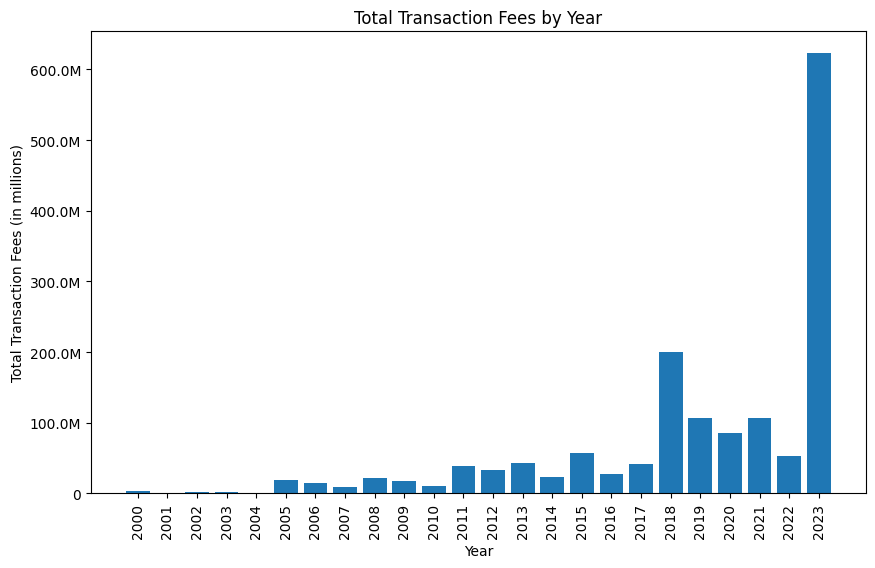

In [158]:

# Filter the data for years up to 2023
filtered_data = df[df['year'] <= 2023]

# Group the filtered data by year and calculate the total transaction fees for each year
grouped_data = filtered_data.groupby('year')['fee'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)

# Set the title and labels
plt.title('Total Transaction Fees by Year')
plt.xlabel('Year')
plt.ylabel('Total Transaction Fees (in millions)')

# Format the y-label with abbreviations (M and K)
def format_ytick(value, tick_number):
    if value >= 1_000_000:
        value = value / 1_000_000
        return f"{value:.1f}M"
    elif value >= 1_000:
        value = value / 1_000
        return f"{value:.1f}K"
    else:
        return f"{value:.0f}"

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ytick))

# Set the x-ticks to show only up to 2023
plt.xticks(range(min(grouped_data.index), 2024), rotation='vertical')

# Display the plot
plt.show()